In [54]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential



In [42]:
#df=pd.read_csv('https://raw.githubusercontent.com/bbrandom91/KC_Housing/master/kc_house_data.csv')
#df.to_csv('kc_house_data.csv')
df=pd.read_csv('kc_house_data.csv')
print(df.columns)

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [43]:
housing=np.array(df)


createdate=housing[:,2]
price=housing[:,3]
bedrooms=housing[:,4]
bathrooms=housing[:,5]
sqft_living=housing[:,6]
sqft_lot=housing[:,7]
floors=housing[:,8]
waterfront=housing[:,9]
view=housing[:,10]
condition=housing[:,11]
grade=housing[:,12]
sqft_above=housing[:,13]
sqft_basement=housing[:,14]
yr_built=housing[:,15]
yr_renovated=housing[:,16]
zipcode=housing[:,17]
lat=housing[:,18]
long=housing[:,19]
sqft_living15=housing[:,20]
sqft_lot15=housing[:,21]
sqft=sqft_above+sqft_basement
#print(housing[3][3],housing[3][17])
#print(housing[0])

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

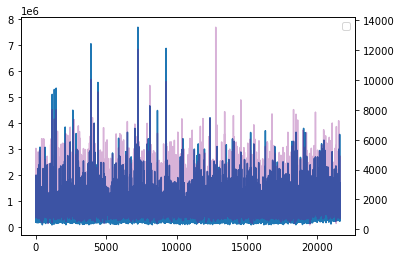

In [44]:
plt.clf()
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(price)
ax2=ax.twinx()
ax2.plot(sqft,color='purple', alpha=.3)
plt.legend()
plt.show()

In [45]:
def linear_regression(intercept, slope, features=sqft):
    return intercept+features*slope

def loss_function(intercept, slope, targets=price, features=sqft):
    # Compute the predicted values
    predictions = linear_regression(intercept, slope)
    
    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)

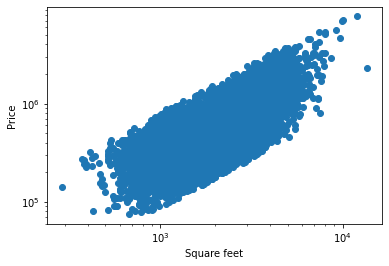

[]

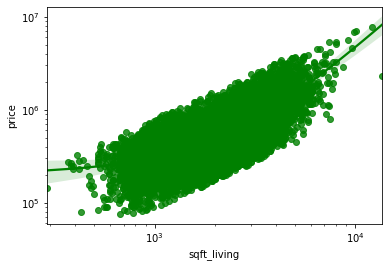

In [46]:
#slope=tf.Variable(0.1,np.float32)
#intercept=tf.Variable(0.1,np.float32)

#opt=tf.keras.optimizers.Adam()
#for j in range(1000):
#    opt.minimize(lambda: loss_function(intercept,slope),\
#    var_list=[intercept,slope])
#    print(loss_function(intercept,slope))
          
plt.scatter(sqft,price)
plt.xlabel('Square feet')
plt.ylabel('Price')
plt.loglog()
plt.show()

sns.regplot(x='sqft_living',y='price', data=df,order=2,color='green',x_jitter=.1)
plt.loglog()

In [47]:
COLUMNS=['bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'sqft_lot15']

TARGET='price'
X=df[COLUMNS]
y=df[TARGET]
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

neuron_size=len(df[COLUMNS].columns)
data_len=len(df)
#print(housing)
housing_tensor = tf.placeholder(tf.float32, shape=[data_len,neuron_size])

dense1 = keras.layers.Dense(neuron_size, activation='sigmoid')(housing_tensor)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3,activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(5,activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)




 shape of dense1:  (21613, 14)

 shape of dense2:  (21613, 3)

 shape of predictions:  (21613, 5)


In [57]:
sqft_def=tf.feature_column.numeric_column("sqft")
sqft_living_def=tf.feature_column.numeric_column("sqft_living")
sqft_lot_def=tf.feature_column.numeric_column("sqft_lot")
bedrooms_def=tf.feature_column.numeric_column("bedrooms")
bathrooms_def=tf.feature_column.numeric_column("bathrooms")
zipcode_def=tf.feature_column.numeric_column("zip")
yr_build_def=tf.feature_column.numeric_column("yr_built")
yr_renovated_def=tf.feature_column.numeric_column("yr_renovated")
rooms_def=tf.feature_column.categorical_column_with_vocabulary_list("rooms",["1","2","3","4","5"])

#feature_list=[sqft_def,sqft_living_def, sqft_lot_def,bedrooms_def,bathrooms_def,zipcode_def,yr_build_def,yr_renovated_def,rooms_def]
feature_list=[sqft_def,bedrooms_def,bathrooms_def]

features={#'sqft':np.array(sqft),
          'bedrooms':np.array(bedrooms),
          'bathrooms':np.array(bathrooms),
          #'sqft_living':sqft_living,
          #'sqft_lot':sqft_lot,
          #'yr_built':yr_built,
        #'yr_renovated':yr_renovated,
        #'zipcode':zipcode
         }
labels=np.array(price)

#model0=tf.estimator.DNNRegressor(feature_columns=feature_list,hidden_units=[10,6,6,1])
model0=tf.estimator.LinearRegressor(feature_columns=feature_list)
model0.train((features,labels),steps=20)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\DNISHI~1.BOI\\AppData\\Local\\Temp\\tmpoa5uiy7r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CB94C7BF48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


TypeError: unsupported callable